In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('wine_fraud.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [80]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

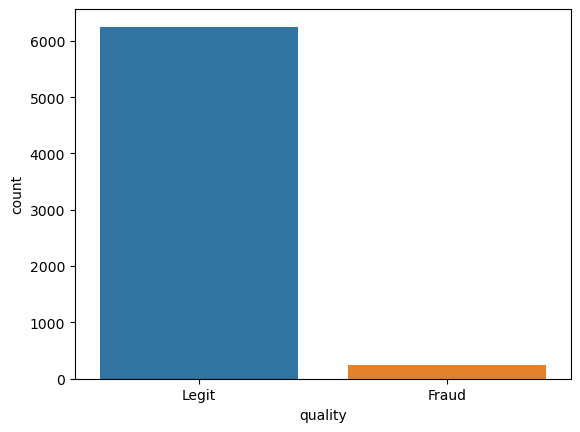

In [81]:
sns.countplot(x='quality',data=df)

In [82]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

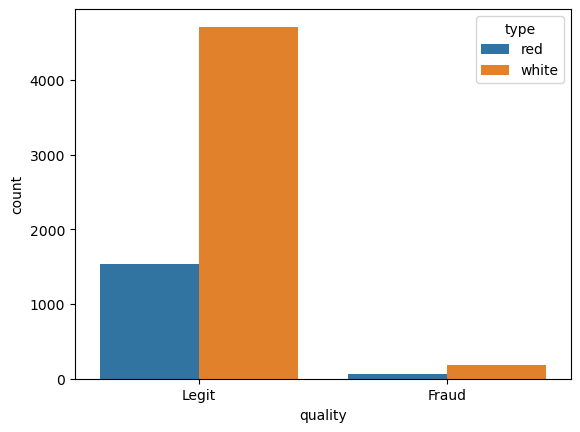

In [83]:
sns.countplot(x='quality',data=df,hue='type')

In [84]:
#% of fraud in white and red wines respectively

red = df[df['type']=='red']
white = df[df['type']=='white']

print('Percentage of Fraud in Red Wines:',100*len(red[red['quality']=='Fraud'])/len(red))
print('Percentage of Fraud in White Wines:',100*len(white[white['quality']=='Fraud'])/len(white))

Percentage of Fraud in Red Wines: 3.9399624765478425
Percentage of Fraud in White Wines: 3.736218864842793


In [85]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [86]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0


In [87]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud'],
      dtype='object')

In [88]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','Fraud']].corr()['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

In [89]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

### Machine Learning Model

In [90]:
X = df.drop(['quality','Fraud'], axis=1)

In [91]:
y = df['quality']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=101)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc = StandardScaler()

In [95]:
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [96]:
from sklearn.svm import SVC

In [97]:
svc = SVC(class_weight='balanced')

##### Grid Search

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[.001,.01,.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [99]:
grid.fit(sc_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [100]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [101]:
grid_pred = grid.predict(sc_X_test)


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

In [103]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [104]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

